<h1> Smart city - Air quality prediction

<h2> Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#loading the data
air = pd.read_csv('AirQualityUCI.csv', delimiter = ';')

**Dataset's features:<br>**
0. **Date** (DD/MM/YYYY)

1. **Time** (HH.MM.SS)

2. True hourly averaged **concentration CO** in mg/m^3 (reference analyzer)

3. PT08.S1 **(tin oxide)** hourly averaged sensor response (nominally CO targeted)

4. True hourly averaged overall **Non Metanic HydroCarbons concentration** in microg/m^3 (reference analyzer)

5. True hourly averaged **Benzene concentration** in microg/m^3 (reference analyzer)

6. PT08.S2 **(titania)** hourly averaged sensor response (nominally NMHC targeted)

7. True hourly averaged **NOx concentration** in ppb (reference analyzer)

8. PT08.S3 **(tungsten oxide)** hourly averaged sensor response (nominally NOx targeted)

9. True hourly averaged **NO2 concentration** in microg/m^3 (reference analyzer)

10. PT08.S4 **(tungsten oxide)** hourly averaged sensor response (nominally NO2 targeted)

11. PT08.S5 **(indium oxide)** hourly averaged sensor response (nominally O3 targeted)

12. **Temperature** in Â°C

13. Relative **Humidity (%)**

<h2>Cleaning and preparing the data

In [2]:
#keeping valid columns and rows
air = air.iloc[:,0:14]
air = air.dropna()

In [3]:
#Reform data to numeric 
air['Date'] = air['Date'].str.replace('/', '')
air['Date'] = air['Date'].str[2:4].astype(int) * 100 + air['Date'].str[0:2].astype(int)
air['Time'] = air['Time'].str[0:2].astype(int)
air['CO(GT)'] = air['CO(GT)'].str.replace(',', '.').astype(float)
air['C6H6(GT)'] = air['C6H6(GT)'].str.replace(',', '.').astype(float)
air['T'] = air['T'].str.replace(',', '.').astype(float)
air['RH'] = air['RH'].str.replace(',', '.').astype(float)

**We have to assign the mean values of each column to every missing value, in order to keep the dataset large enough**

In [4]:
air = air.replace(to_replace = {'CO(GT)': {-200.0: round( air[air['CO(GT)'] > 0]['CO(GT)'].mean() , 1)} } )
air = air.replace(to_replace = {'C6H6(GT)': {-200.0: round( air[air['C6H6(GT)'] > 0]['C6H6(GT)'].mean() , 1)} })
air = air.replace(to_replace = {'PT08.S1(CO)': {-200.0: round( air[air['PT08.S1(CO)'] > 0]['PT08.S1(CO)'].mean() , 1)} })
air = air.replace(to_replace = {'NMHC(GT)': {-200.0: round( air[air['NMHC(GT)'] > 0]['NMHC(GT)'].mean() , 1)} })
air = air.replace(to_replace = {'NOx(GT)': {-200.0: round( air[air['NOx(GT)'] > 0]['NOx(GT)'].mean() , 1)} })
air = air.replace(to_replace = {'NO2(GT)': {-200.0: round( air[air['NO2(GT)'] > 0]['NO2(GT)'].mean() , 1)} })
air = air.replace(to_replace = {'PT08.S2(NMHC)': {-200.0: round( air[air['PT08.S2(NMHC)'] > 0]['PT08.S2(NMHC)'].mean() , 1)} })
air = air.replace(to_replace = {'PT08.S3(NOx)': {-200.0: round( air[air['PT08.S3(NOx)'] > 0]['PT08.S3(NOx)'].mean() , 1)} })
air = air.replace(to_replace = {'PT08.S4(NO2)': {-200.0: round( air[air['PT08.S4(NO2)'] > 0]['PT08.S4(NO2)'].mean() , 1)} })
air = air.replace(to_replace = {'PT08.S5(O3)': {-200.0: round( air[air['PT08.S5(O3)'] > 0]['PT08.S5(O3)'].mean() , 1)} }) 
air = air.replace(to_replace = {'T': {-200.0: round( air[air['T'] > 0]['T'].mean() , 1)} }) 
air = air.replace(to_replace = {'RH': {-200.0: round( air[air['RH'] > 0]['RH'].mean() , 1)} }) 

<h2> Diagrams

<h3>Correlation matrix

**Let's look what's happening**

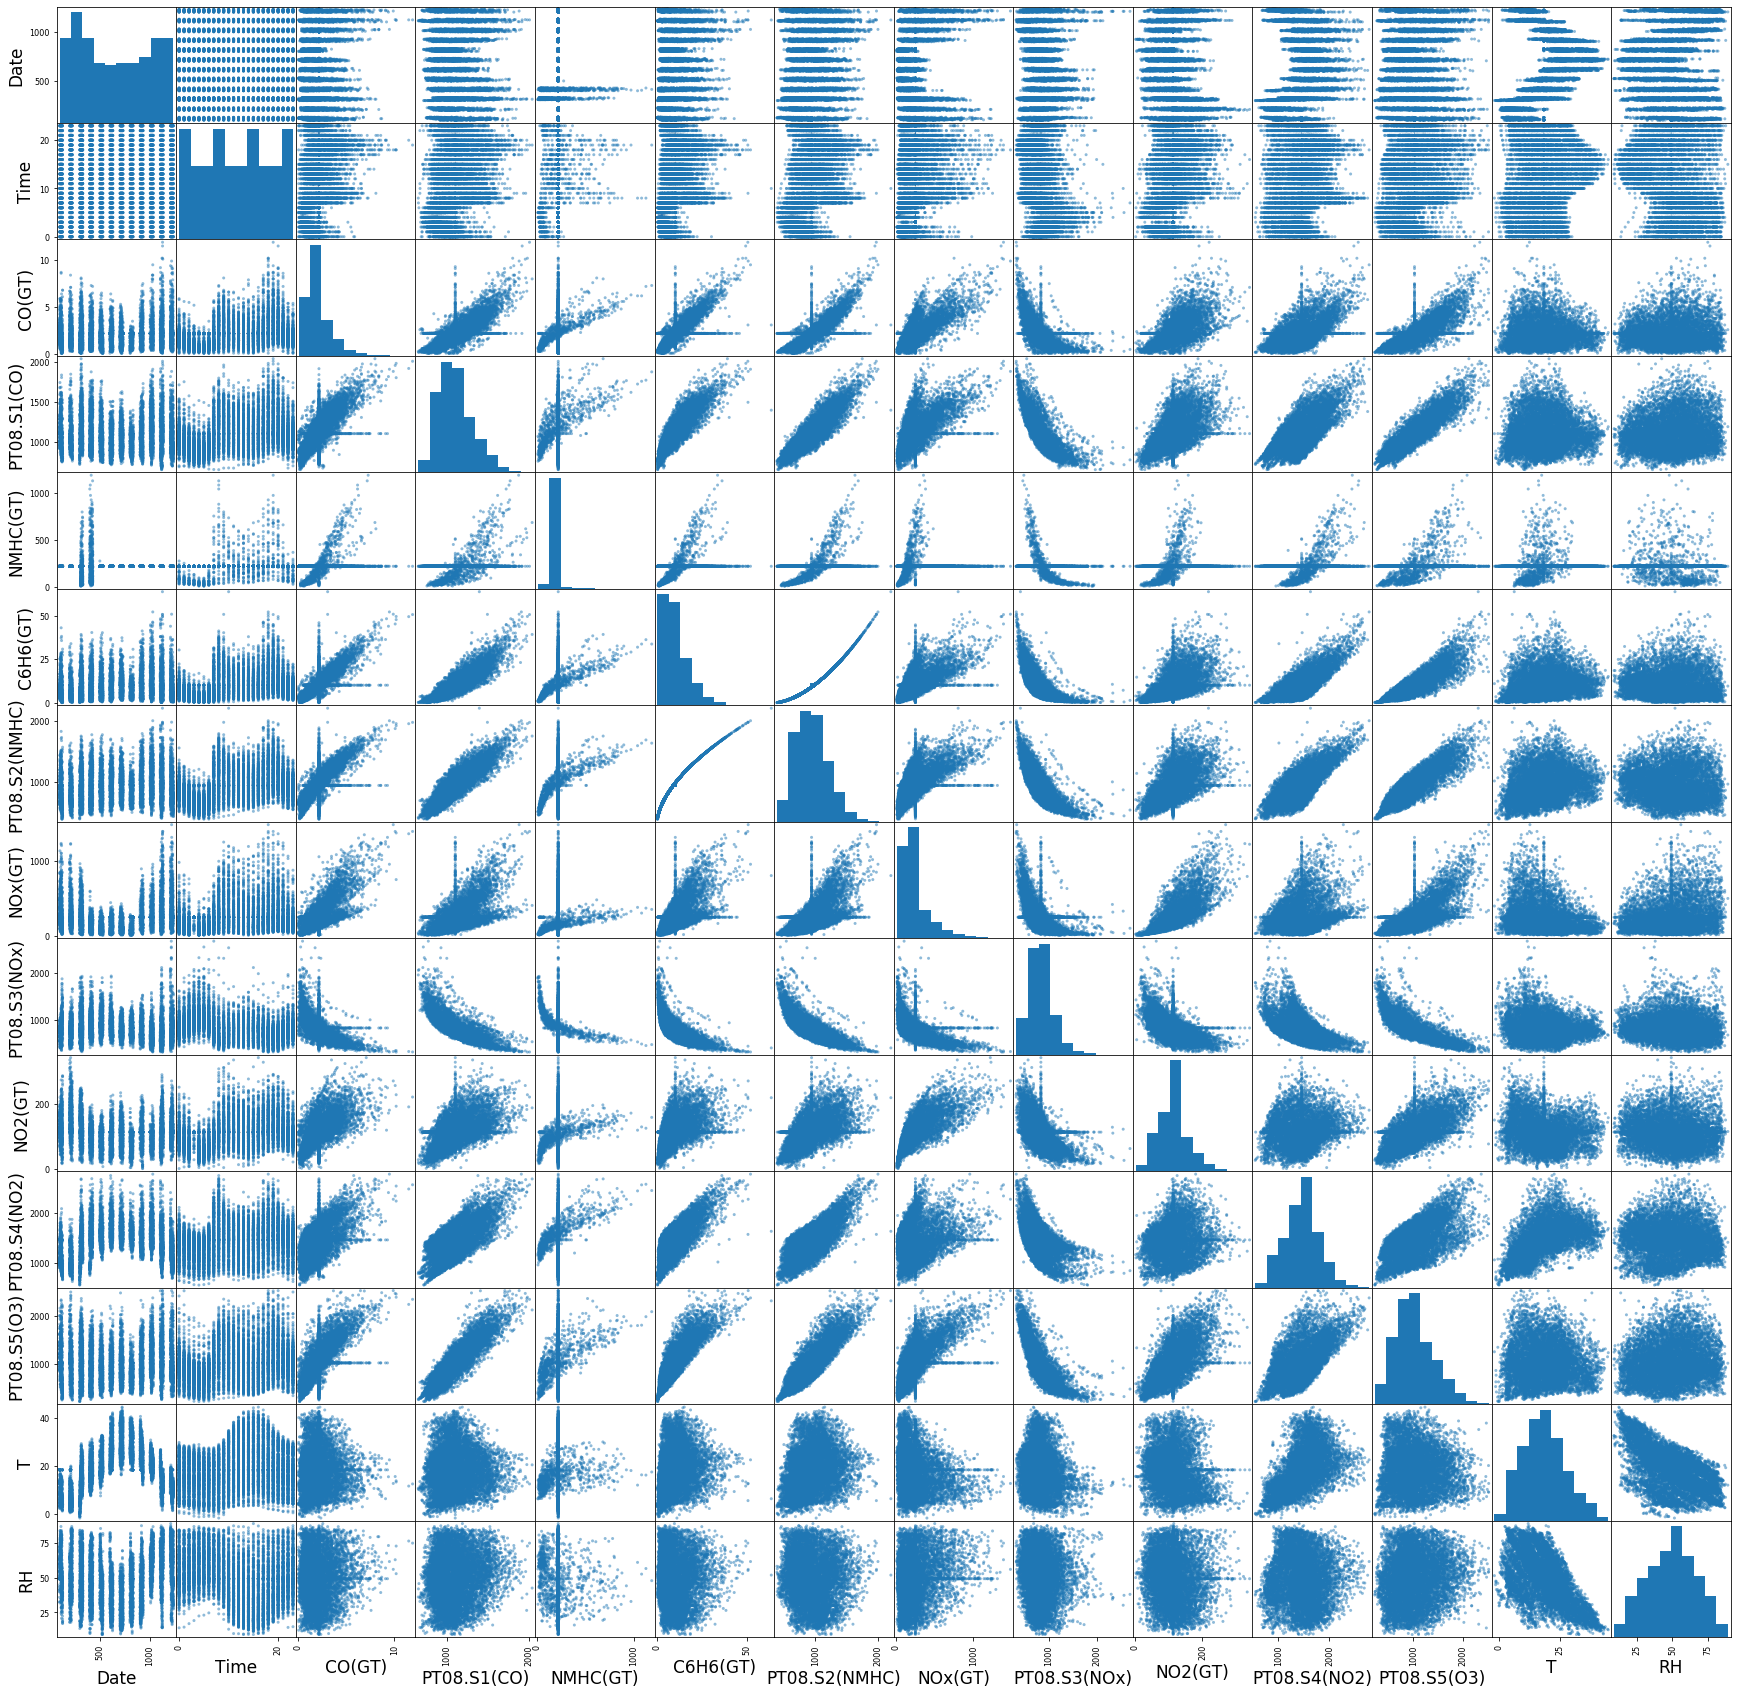

In [5]:
from pandas.plotting import scatter_matrix

plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
plt.rc('ytick', labelsize=17)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('legend', fontsize=17) 
scatter_matrix(air, figsize=(30,30));

>There are obvious strong correlations between the concentration of different air pollutants

<h3>Chart of hourly average concentration of CO and NO2

C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


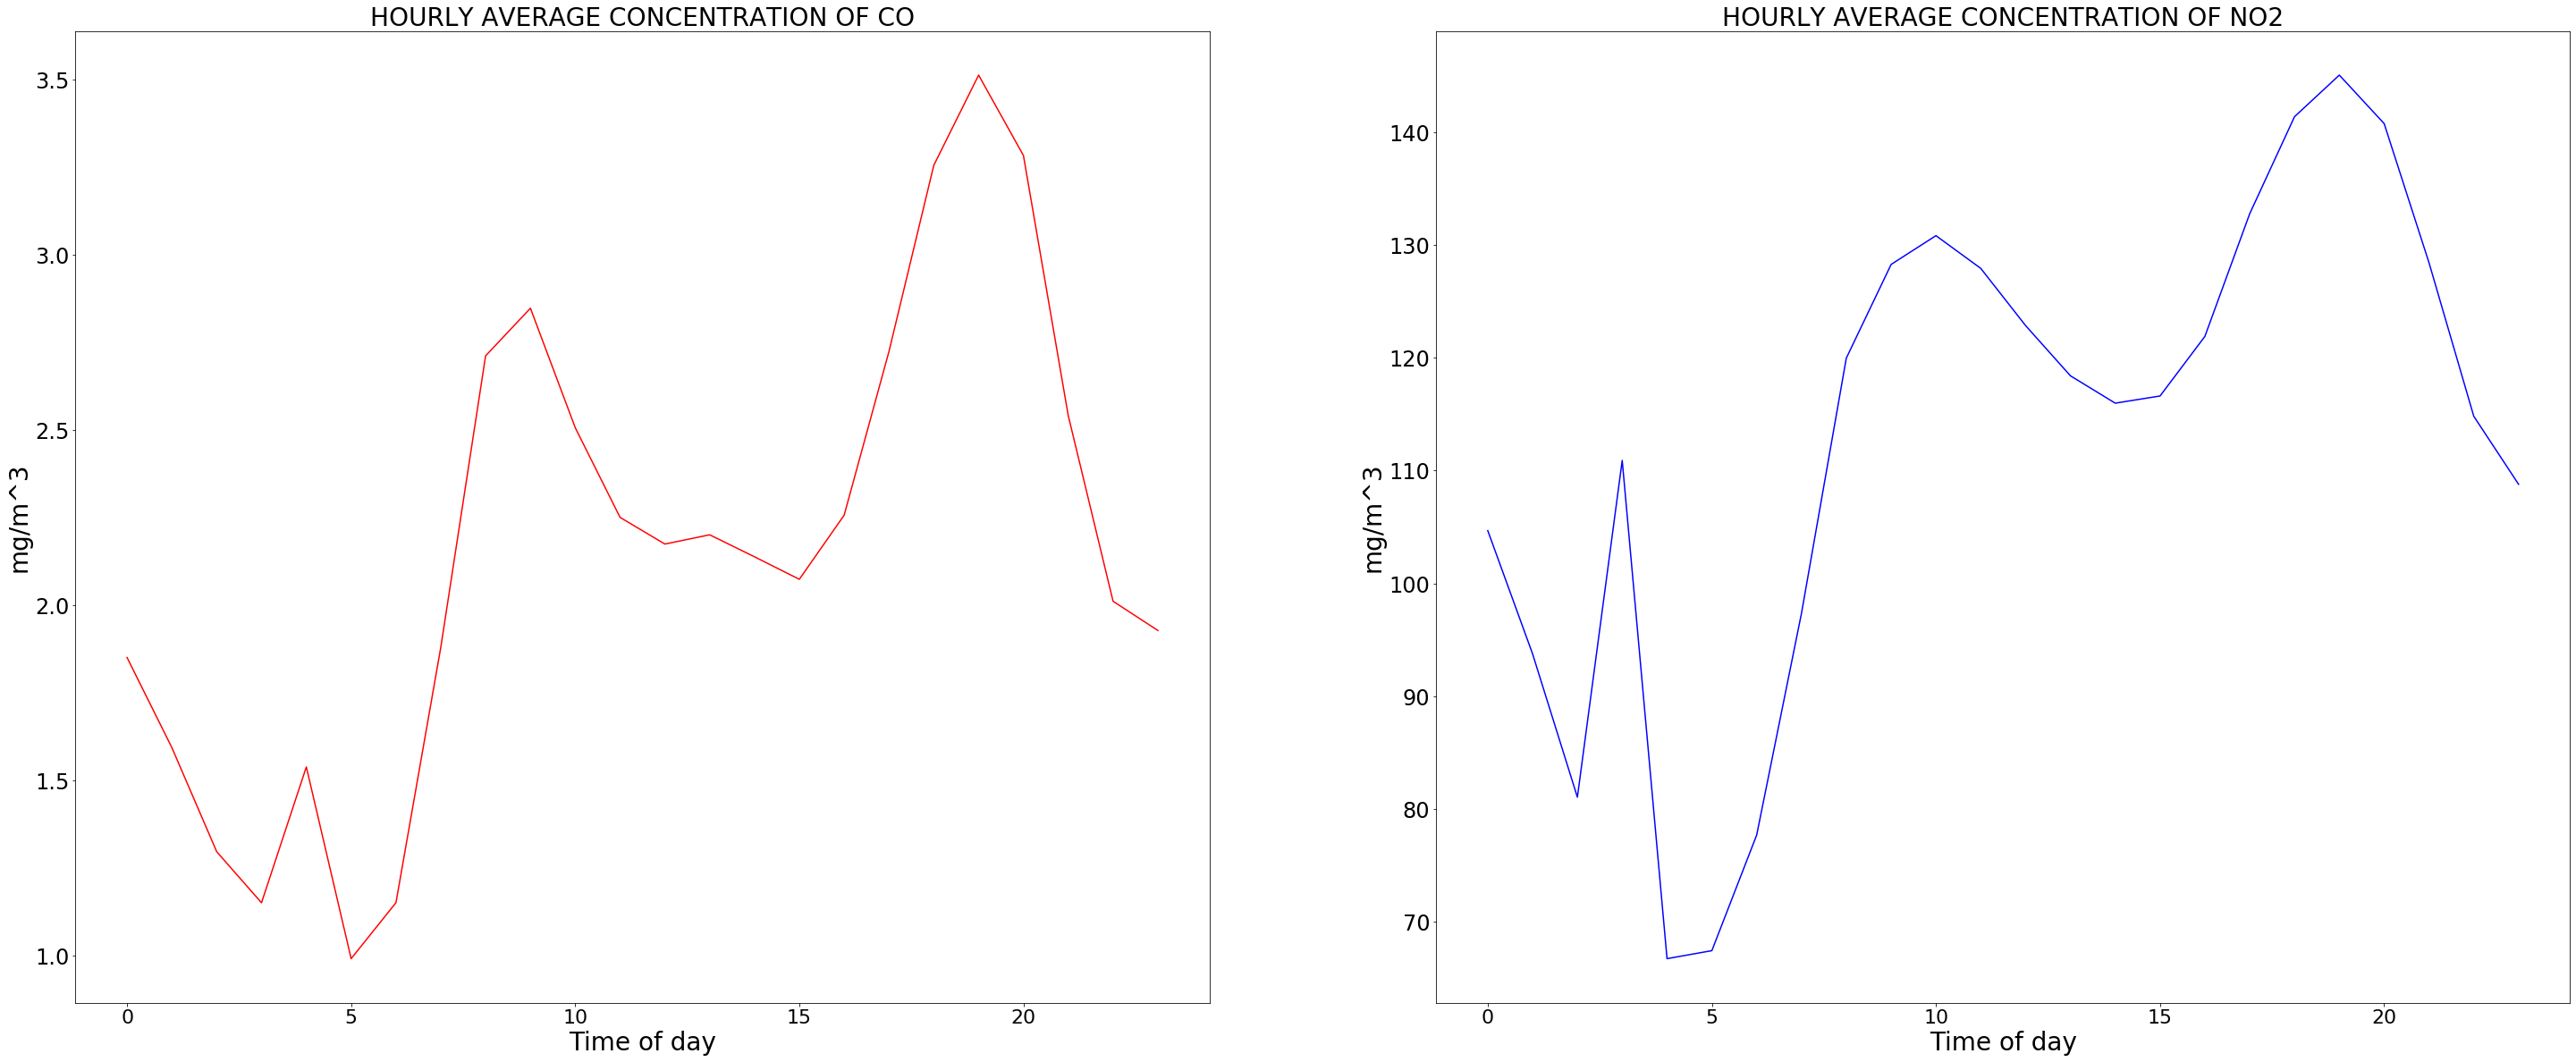

In [6]:
x_time = air.Time.unique()
y = np.zeros(x_time.shape)
y2 = np.zeros(x_time.shape)
x_time.sort()

for i in range (0, x_time.shape[0]):
    y[i] = (air[air.Time == x_time[i]]['CO(GT)'].mean())
    y2[i] = (air[air.Time == x_time[i]]['NO2(GT)'].mean())

plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)
plt.rc('axes', titlesize=28)
plt.rc('axes', labelsize=28)
plt.rc('legend', fontsize=24) 
fig, axes = plt.subplots(1, 2, figsize=(50, 20))
axes[0].plot(x_time, y, 'r')
axes[0].set_xlabel('Time of day')
axes[0].set_ylabel('mg/m^3')
axes[0].set_title("HOURLY AVERAGE CONCENTRATION OF CO")
axes[1].plot(x_time, y2, 'b')
axes[1].set_xlabel('Time of day')
axes[1].set_ylabel('mg/m^3')
axes[1].set_title("HOURLY AVERAGE CONCENTRATION OF NO2")
fig.show()

<h3>Chart of hourly average concentration of NOx

C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


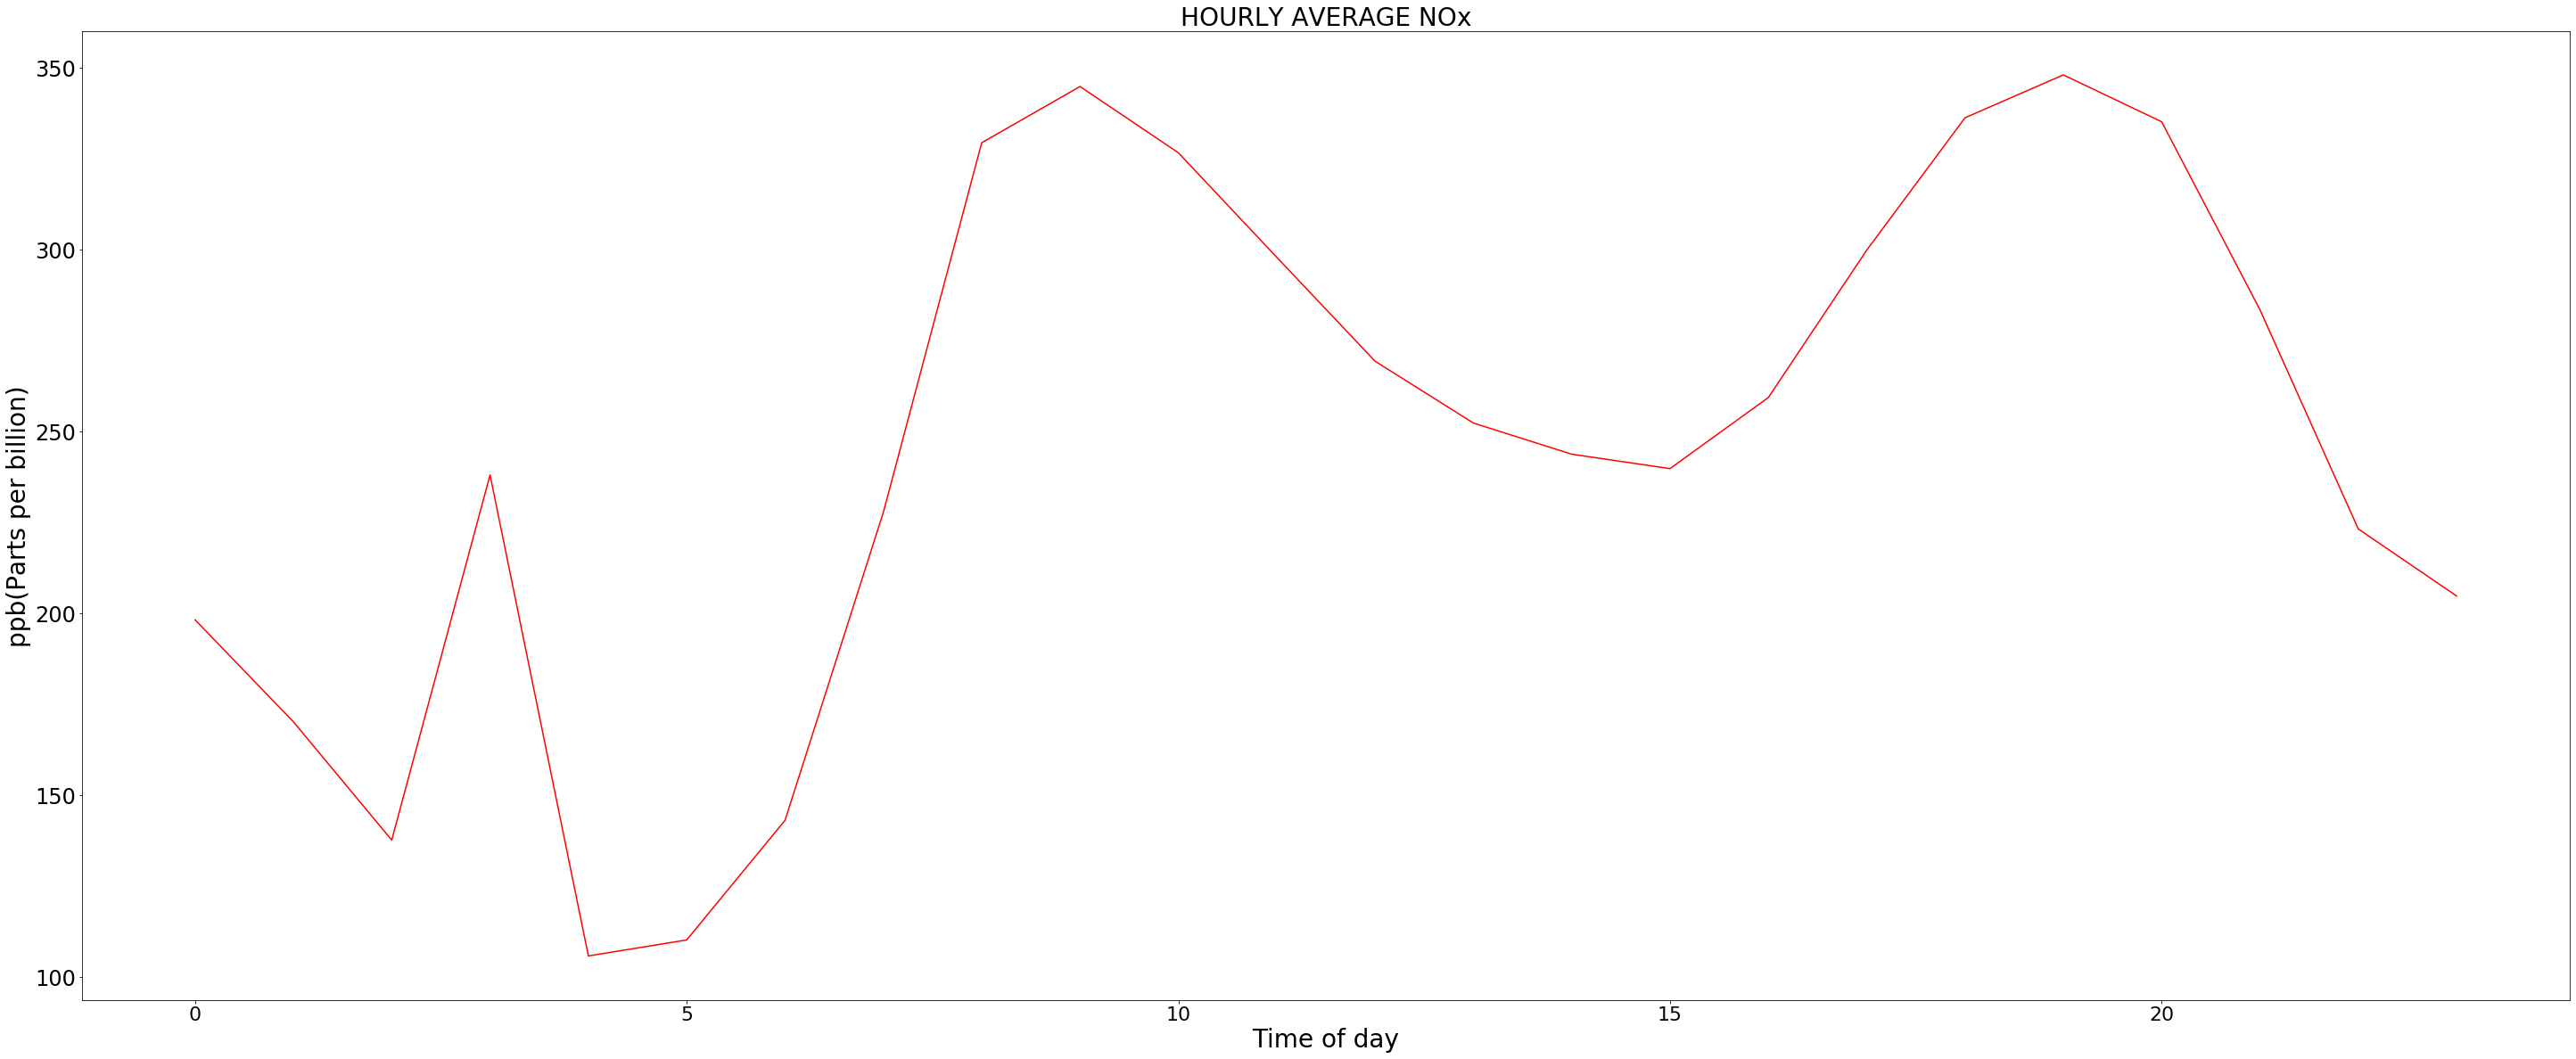

In [9]:
for i in range (0, x_time.shape[0]):
    y[i] = (air[air.Time == x_time[i]]['NOx(GT)'].mean())

fig, axes = plt.subplots(1, 1, figsize=(50, 20))
axes.plot(x_time, y, 'r')
axes.set_xlabel('Time of day')
axes.set_ylabel('ppb(Parts per billion)')
plt.title("HOURLY AVERAGE NOx")
fig.show()

>**We observe a general tendency of high air pollutants concentration between 9-10 in the morning and 19-20 at night**

<h3>Daily average concentration of NO2 and CO

**Let's check what happens over the course of the year**

C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


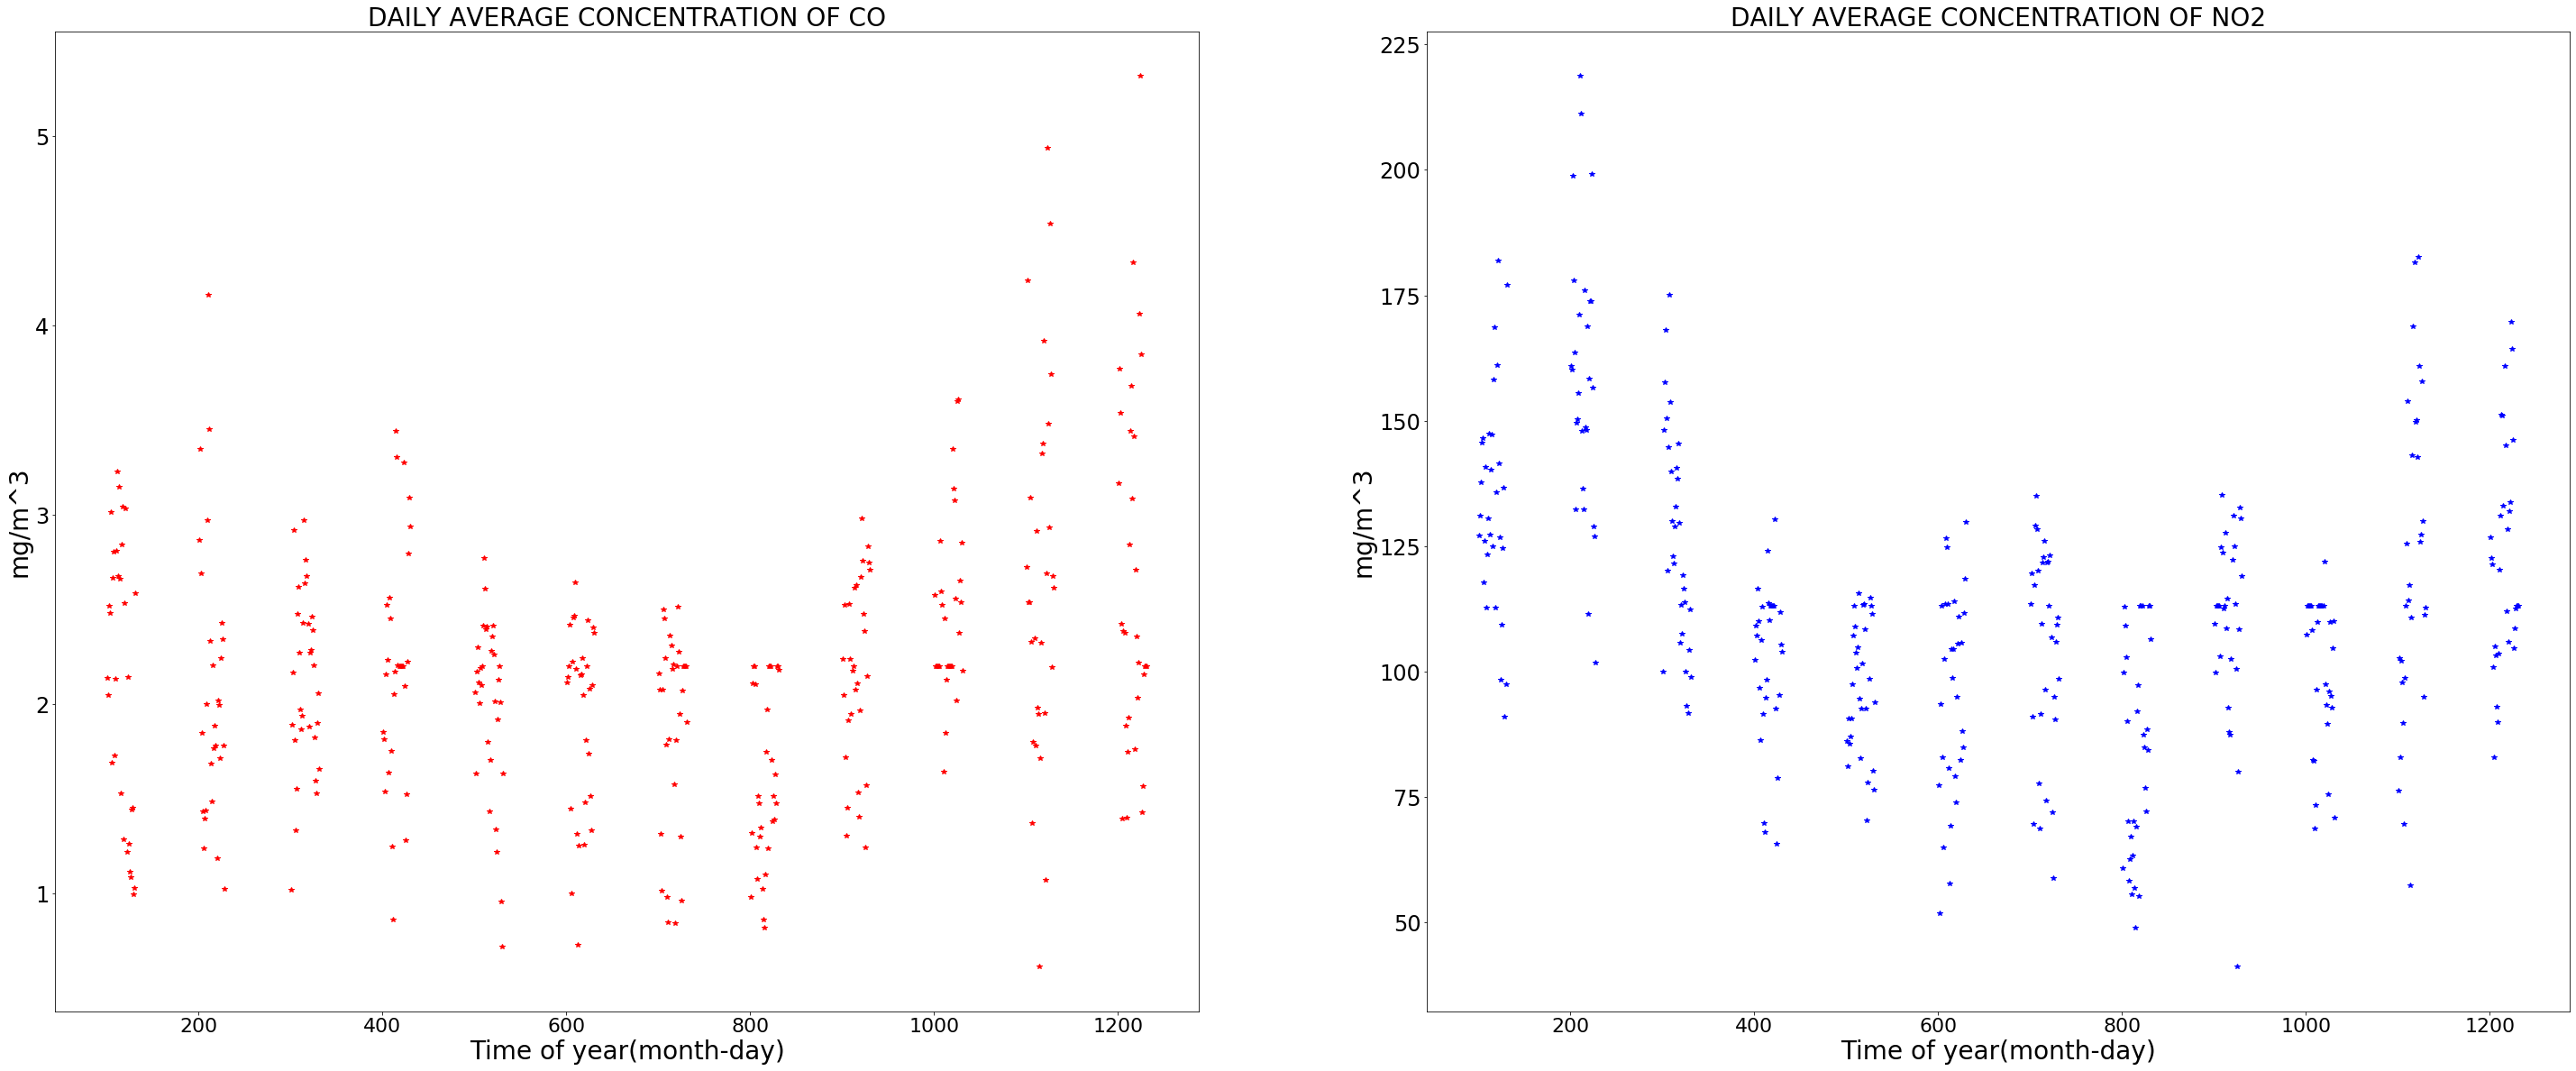

In [10]:
x_time = air.Date.unique()
y = np.zeros(x_time.shape)
y2 = np.zeros(x_time.shape)
x_time.sort()

for i in range (0, x_time.shape[0]):
    y[i] = (air[air.Date == x_time[i]]['CO(GT)'].mean())
    y2[i] = (air[air.Date == x_time[i]]['NO2(GT)'].mean())

fig, axes = plt.subplots(1, 2, figsize=(50, 20))
axes[0].plot(x_time, y, '*r')
axes[0].set_xlabel('Time of year(month-day)')
axes[0].set_ylabel('mg/m^3')
axes[0].set_title("DAILY AVERAGE CONCENTRATION OF CO")
axes[1].plot(x_time, y2, '*b')
axes[1].set_xlabel('Time of year(month-day)')
axes[1].set_ylabel('mg/m^3')
axes[1].set_title("DAILY AVERAGE CONCENTRATION OF NO2")
fig.show()

Empty intervals along x-axis are the result of sparse mapping (date->integer)

>**It's obvious that from day to day we have much variation and that means that we can't generalize the previous observations on hourly concentrations,thus we need ML algorithms to make more accurate and valid predictions depending on the ocassion**

<h2> Regression models - Predicting CO concentrations

>**We try to predict the CO concentrations using date/time data, temperature and humidity and see how close we can get hoping that there is a pattern formed.**

<h3> Data Split

In [11]:
# split the data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
train, test = train_test_split(air, test_size=0.2, random_state=8)

x_train = train[['Date', 'Time', 'T', 'RH']].values
y_train = train['CO(GT)']

x_test = test[['Date', 'Time', 'T', 'RH']].values
y_test = test['CO(GT)']

<h3> Linear Regression

In [13]:
#try linear regression from statsmodel 
model = sm.OLS(np.asarray(y_train), np.asarray(sm.add_constant(x_train))).fit()
predictions = model.predict(sm.add_constant(x_test)) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     301.5
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          8.19e-241
Time:                        20:28:04   Log-Likelihood:                -12173.
No. Observations:                7485   AIC:                         2.436e+04
Df Residuals:                    7480   BIC:                         2.439e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5445      0.087      6.288      0.0

>**R-squared is terrible(0.14), but let's check the predictions on our test set:**

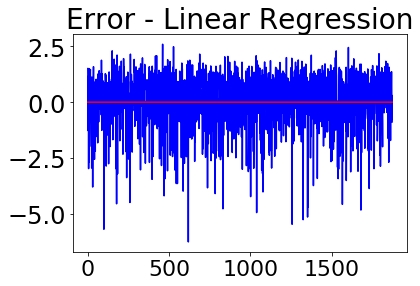

In [14]:
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error - Linear Regression");

>**Given the fact that CO concentrations values are between 1 and 3, the results are terrible**

<h3> Polynomial regression

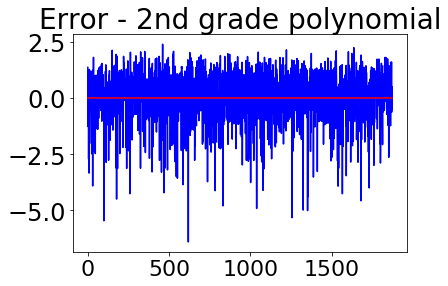

In [15]:
poly = PolynomialFeatures(degree = 2) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error - 2nd grade polynomial");

>**Results are equally terrible using second-grade polynomial**

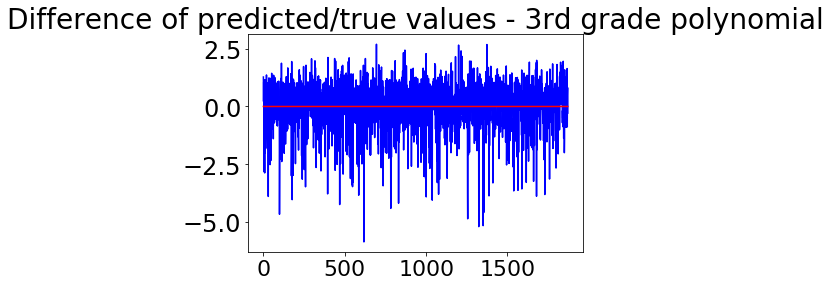

In [16]:
poly = PolynomialFeatures(degree = 3) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - 3rd grade polynomial");

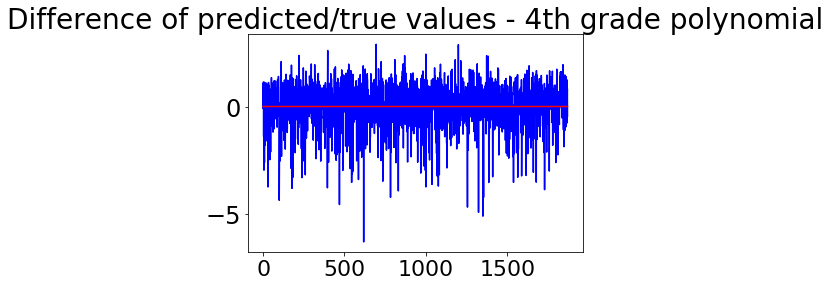

In [17]:
poly = PolynomialFeatures(degree = 4) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - 4th grade polynomial");

>**Even worse with higher grade polynomials**

<h3> Non-parametric Regression (Decision Tree, Random Forest, k-Means)

**Let's try non-parametric algorithms**

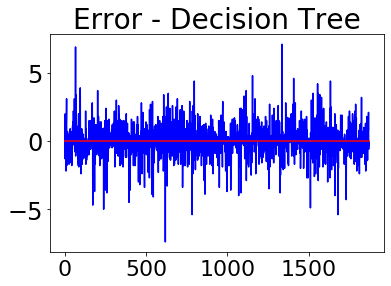

In [18]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b' , range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error - Decision Tree");

C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


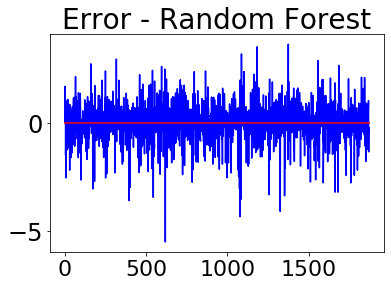

In [19]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error - Random Forest");

>**Again the error in the predictions is too big in relevance to the values of the target**

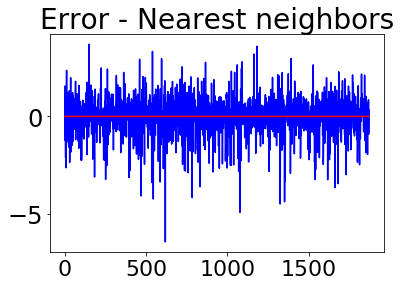

In [20]:
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)

predictions = neigh.predict(x_test)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error - Nearest neighbors");

>**In essence, it is crystal clear that regression is useless with such limited input features**

<h2> Classification Models - Hazardous evenings

>**Now we will try to classify a given day as hazardous or not, while keeping track of the morning measurements, in order to be at least able to protect citizens in the evening. Our cut-off point for classification will be 3 mg/m^3 in the evening hours.**

<h3>Producing the new predictors and target

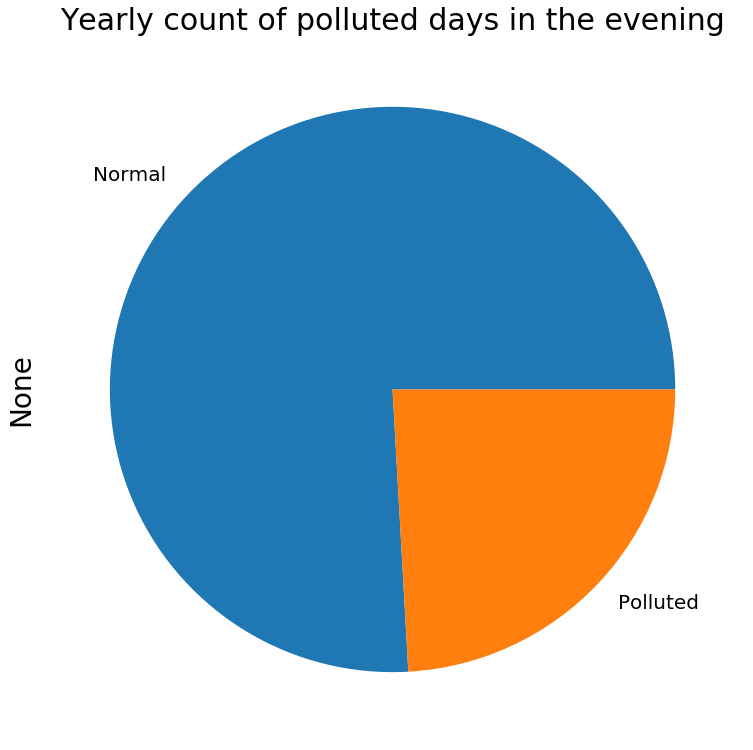

In [21]:
#keeping track of morning values via average concentration
x_day = air.Date.unique()
x_new = np.zeros((x_day.shape[0],12))
y_new = np.zeros(x_day.shape)
x_day.sort()

good_count = 0
bad_count = 0

for i in range (0, x_day.shape[0]):
    temp = air[(air.Date == x_day[i]) & (air.Time > 7)  & (air.Time < 14)].iloc[:,2:14]
    x_new[i] = temp.mean().values
    check = (air[(air.Date == x_day[i]) & (air.Time > 16) & (air.Time < 21) ]['CO(GT)'].mean())
    if(check < 4):
        y_new[i] = 0
        good_count = good_count + 1
    else:
        y_new[i] = 1
        bad_count = bad_count + 1
        
#histogram of polluted vs normal days
lista = {}
lista.update({'Normal':good_count})
lista.update({'Polluted':bad_count})

stock = pd.Series(lista)
ax = stock.plot(kind='pie', figsize = (35,13), fontsize = 20)
ax.set_title(label = 'Yearly count of polluted days in the evening', fontsize = 30);

<h3> Building classification models

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
#train and test set split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
classifiers = [LogisticRegression(random_state=0, solver = 'lbfgs'),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

for name, classifier in zip( names, classifiers):
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(name, '\n', cm)
    print(classification_report(y_test, y_pred))

Logistic Regression 
 [[50  4]
 [11  8]]
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        54
         1.0       0.67      0.42      0.52        19

    accuracy                           0.79        73
   macro avg       0.74      0.67      0.69        73
weighted avg       0.78      0.79      0.78        73

Kernel SVM 
 [[50  4]
 [13  6]]
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        54
         1.0       0.60      0.32      0.41        19

    accuracy                           0.77        73
   macro avg       0.70      0.62      0.63        73
weighted avg       0.74      0.77      0.74        73

Naive Bayes 
 [[45  9]
 [ 6 13]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        54
         1.0       0.59      0.68      0.63        19

    accuracy                           0.79        73
   macro avg       0.7

>**Classification results have around 80% overall accuracy but low performance on predicting polluted days
(around 60% precision, 50% recall). That shows that evening pollution levels are not very relevant to morning levels,
thus we need more relevant features**

<h2> Conclusion

> **After testing many regression models we can easily conclude to the lack of input features. Predicting a city's air pollution is a much harder task that requires a lot more input data to be considered. Some ideas: daily traffic levels,daily work load of nearby industries, meteorological data and more...**